<a href="https://colab.research.google.com/github/MPaul789/Image-Classifier-CNN/blob/main/Image_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_test.shape
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
#Convert it into 1Darray
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test =y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
classes = ['airplane', 'automibile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

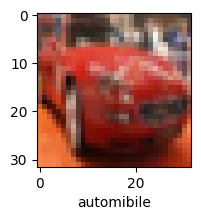

In [9]:
plot_sample(X_train, y_train, 5)

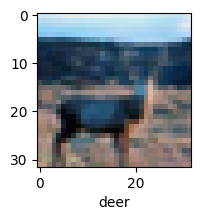

In [10]:
plot_sample(X_train, y_train, 505)

In [11]:
#Normalizing
X_train = X_train/255.0
X_test - X_test/255.0

array([[[[157.38039216, 111.56078431,  48.80784314],
         [158.37647059, 110.56470588,  46.81568627],
         [164.35294118, 115.54509804,  50.8       ],
         ...,
         [136.4627451 ,  94.62745098,  35.85882353],
         [125.50588235,  90.64313725,  35.85882353],
         [115.54509804,  84.66666667,  32.87058824]],

        [[151.40392157, 111.56078431,  50.8       ],
         [150.40784314, 109.56862745,  39.84313725],
         [158.37647059, 113.55294118,  44.82352941],
         ...,
         [135.46666667,  94.62745098,  30.87843137],
         [124.50980392,  90.64313725,  31.8745098 ],
         [118.53333333,  87.65490196,  33.86666667]],

        [[150.40784314, 109.56862745,  46.81568627],
         [150.40784314, 108.57254902,  32.87058824],
         [157.38039216, 110.56470588,  35.85882353],
         ...,
         [138.45490196,  97.61568627,  33.86666667],
         [129.49019608,  94.62745098,  33.86666667],
         [119.52941176,  88.65098039,  32.87058824]],

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
ann.compile(optimizer= 'SGD', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 91ms/step - loss: 1.8103 - accuracy: 0.3579
Epoch 2/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.6218 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5380 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4813 - accuracy: 0.4803
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4313 - accuracy: 0.4984


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.52      0.57      0.55      1000
           1       0.44      0.77      0.56      1000
           2       0.39      0.29      0.34      1000
           3       0.32      0.41      0.36      1000
           4       0.41      0.42      0.42      1000
           5       0.46      0.25      0.33      1000
           6       0.62      0.38      0.47      1000
           7       0.63      0.47      0.54      1000
           8       0.62      0.59      0.61      1000
           9       0.48      0.58      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel("Truth")
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [14]:
#cnn model to train the images

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [15]:
cnn.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5719 - accuracy: 0.7989
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.5375 - accuracy: 0.8104
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5065 - accuracy: 0.8212
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.4795 - accuracy: 0.8304
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.4497 - accuracy: 0.8404
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.4220 - accuracy: 0.8504
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.4013 - accuracy: 0.8565
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3752 - accuracy: 0.8665
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.3519 - accuracy: 0.8735
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [ ]:
cnn.evaluate(X_test, y_test)

In [19]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 11ms/step


In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 9, 0, 5]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

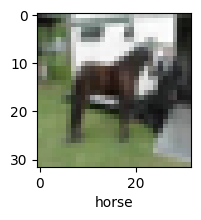

In [32]:
plot_sample(X_test, y_test, 20)

In [33]:
classes[y_classes[20]]

'horse'

In [ ]:
cnn.save("model.h5")